In [24]:

# rename image files in a folder

import glob, os


# PATH = 'F:\DeeplearningTest\data\IMG'
PATH = 'E:/PHD_Image_2017/weedDetectionPhD/dataset'
OUTPUT = 'C:/Users/junfeng/PycharmProjects/WeedDetectionPHD/dataset'

##################################################################
                                                           

## the file name will be turned to 'classname + index +.jpg'   ##

#################################################################

for root, dirs, files in os.walk(PATH):
    
    for subfold in dirs:
        traindir = os.path.join(PATH, subfold) # get the classname behind PATH directory
        traindirFiles = os.listdir(traindir) # get all the files in one this class
        i = 1 # start point of file name in this class
        for file in traindirFiles: # iterative files in one class
            try:
                os.rename(os.path.join(traindir, file), os.path.join(traindir, subfold +'.'+str(i)+'.jpg'))
                i +=1 # rename next file  
            except:FileExistsError  # to ensure programe runs no matter file exist error


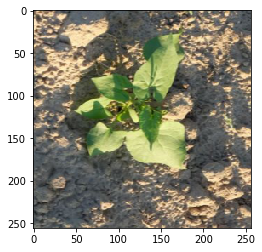

In [25]:
import numpy as np
import cv2 
from PIL import Image 
import scipy 
from scipy import ndimage
from matplotlib import pyplot as plt
%matplotlib inline
# path = 'F:\\DeeplearningTest - Copy\\data\\IMG\\bindweed\\bindweed.1.jpg'
path = 'E:/PHD_Image_2017/weedDetectionPhD/dataset/bindweed/bindweed.1.jpg'
image2 = np.array(ndimage.imread(path))
image3 = cv2.resize(image2, (256,256))
plt.figure()
plt.imshow(image3)
# print(image3.shape)

### resize image to be smaller so as to feed to neural network###
- the size should be 256 * 256
- create entile image data 

In [27]:
import scipy.misc
data_list = []
classfold = os.listdir(PATH)

for fold in classfold:
    print('loading data + {}\n'.format(fold))
    i = 0
    fullClassfold = os.path.join(PATH,fold)
    files = os.listdir(fullClassfold)
    for file in files:
        fullfilefold = os.path.join(fullClassfold,file) # the full fold of image 
        img = ndimage.imread(fullfilefold)
        i += 1
        imgResized = scipy.misc.imresize(img, (256,256))
        scipy.misc.imsave(fullfilefold,imgResized)
#         imgResized = cv2.resize(img,(256,256)) # can change its dimension based on your own requirements 
#         cv2.imwrite(fullfilefold,imgResized) !!!using this code, the color of the saved image has changed !!!! 
        # append image data to the datalist
        data_list.append(imgResized)
    print('---{}-{} images were found in total--- \n'.format(i, fold))
          




loading data + bindweed

---282-bindweed images were found in total--- 

loading data + dockweed

---22-dockweed images were found in total--- 

loading data + lambsquarters

---116-lambsquarters images were found in total--- 

loading data + maize

---513-maize images were found in total--- 

loading data + sow thistle

---478-sow thistle images were found in total--- 

loading data + volunteer potatos

---86-volunteer potatos images were found in total--- 



#### pre-processing image data
- scale to [0,1]


In [98]:
# imagedata = np.squeeze(image_data1, axis = 2) for squeeze data reduce dimension
# print(imagedata.shape)

image_data_raw = np.array(data_list)
image_data = image_data_raw.astype('float32')
image_data = (image_data / 255) # scale to [0,1]. explore sklearn.preprocessing.scale for normalized data

print(image_data.shape)

(156, 256, 256, 3)


In [146]:
np.zeros(image_data.shape[0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [152]:
# need to be confirm


from keras.utils import np_utils

num_classes = 5
label = np.zeros(image_data.shape[0])
label[0:36] = 0
label[36:66] = 1
label[66:96] = 2
label[96:126] = 3
label[126:156] = 4

names = ['bindweed', 'lambquarter', 'maize', 'sow thistle', 'volunter potato']

# convert class name to be one-hot encoding

Y = np_utils.to_categorical(label, num_classes)


In [154]:
print(Y)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  

In [155]:
import sklearn
print (sklearn.__version__)

0.18.2


In [191]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

# splite data randomly 
x,y = shuffle(image_data, Y, random_state = 0)

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, stratify = label)# random_state should be same as shuffle
#################################
### ！！！！！Split every class not equal！！！！！
################################


print(np.sum(test_y[:,4] == 1))
print(test_y.shape)

7
(32, 5)


In [157]:
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import adam, SGD, RMSprop


In [158]:
input_shape = image_data[0].shape
print(input_shape)


model = Sequential()
model.add(Convolution2D(32,5,5, border_mode = 'same', input_shape = input_shape))
model.add(Activation ('relu'))
model.add(Convolution2D(32,3,3))
model.add(MaxPooling2D(pool_size = (2,2)))  # give me a reminder that resize image should be 2**n
model.add(Dropout(0.5))

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']  )



(256, 256, 3)


C:\WinPython3.5\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same", input_shape=(256, 256,...)`
  
C:\WinPython3.5\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
C:\WinPython3.5\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


In [159]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
activation_19 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
activation_20 (Activation)   (None, 125, 125, 64)      0         
__________

In [160]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 256, 256, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (5, 5),
   'name': 'conv2d_18',
   'padding': 'same',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu',
   'name': 'activation_19',
   'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class

##### train model

In [169]:

import time 
time1 = time.time()
num_epoch = 40

hist = model.fit(train_x, train_y, batch_size = 15, epochs = num_epoch, verbose = 1, validation_data = (test_x,test_y))

time2 = time.time()
print(time2 - time1)

Train on 124 samples, validate on 32 samples
Epoch 1/40
124/124 [==============================] - 60s - loss: 8.0421 - acc: 0.1613 - val_loss: 1.5905 - val_acc: 0.2500
Epoch 2/40
124/124 [==============================] - 62s - loss: 1.6684 - acc: 0.2500 - val_loss: 1.6084 - val_acc: 0.1875
Epoch 3/40
124/124 [==============================] - 62s - loss: 1.5928 - acc: 0.2742 - val_loss: 1.6085 - val_acc: 0.1875
Epoch 4/40
124/124 [==============================] - 61s - loss: 1.5754 - acc: 0.2258 - val_loss: 1.6085 - val_acc: 0.1875
Epoch 5/40
124/124 [==============================] - 62s - loss: 1.5277 - acc: 0.2661 - val_loss: 1.5838 - val_acc: 0.3750
Epoch 6/40
124/124 [==============================] - 65s - loss: 1.6936 - acc: 0.1855 - val_loss: 1.6086 - val_acc: 0.1875
Epoch 7/40
124/124 [==============================] - 65s - loss: 1.5980 - acc: 0.1774 - val_loss: 1.6084 - val_acc: 0.2500
Epoch 8/40
124/124 [==============================] - 63s - loss: 1.5744 - acc: 0.3145 

#### draw plot to see the accuracy trendency


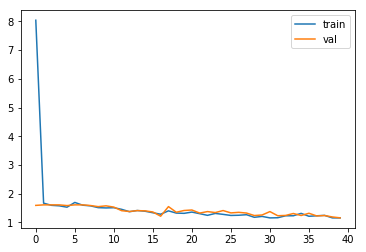

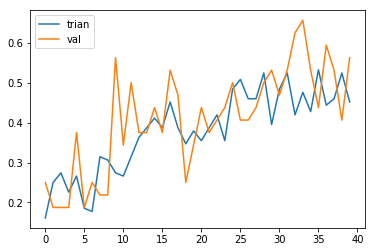

In [170]:
% matplotlib inline
train_loss =  hist.history['loss']
val_loss = hist.history['val_loss']

train_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
x = np.arange(40)

plt.plot(x, train_loss, x, val_loss)
plt.legend(['train','val'])

plt.figure()
plt.plot(x, train_accuracy, x, val_accuracy)
plt.legend(['trian','val'])

#### Evaluation the model
- see the score 
- import another image and see the prediction
- use some test data set

#### visualization intermediate layers


In [171]:
from keras import backend as K

def get_feature_map(model, layerID, X_batch):
    
    """
    parameters
    mdoel-- developed model
    layerID--- layer number
    X_batch --- input image

    """
    get_activation = K.function([model.layers[0].input, K.learning_phase()], [model.layers[layerID].output, ])
    activations = get_activation([X_batch, 0])
    return activations

In [175]:
layer_num = 3
filter_num = 0
testimage = np.expand_dims(test_x[0], axis = 0) # add another axis in the raw image (1,256,256,3) correspondce with()
activations = get_feature_map(model, layer_num,testimage)
print (np.shape(activations))
featuremap = activations[0][0]
print(np.shape(featuremap))

(1, 1, 127, 127, 32)
(127, 127, 32)


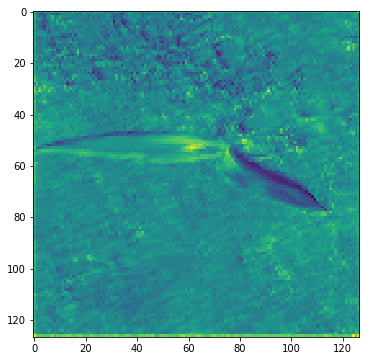

In [176]:
fig = plt.figure(figsize = (6,6))
plt.imshow(featuremap[:,:,layer_num])


<function matplotlib.pyplot.imshow>

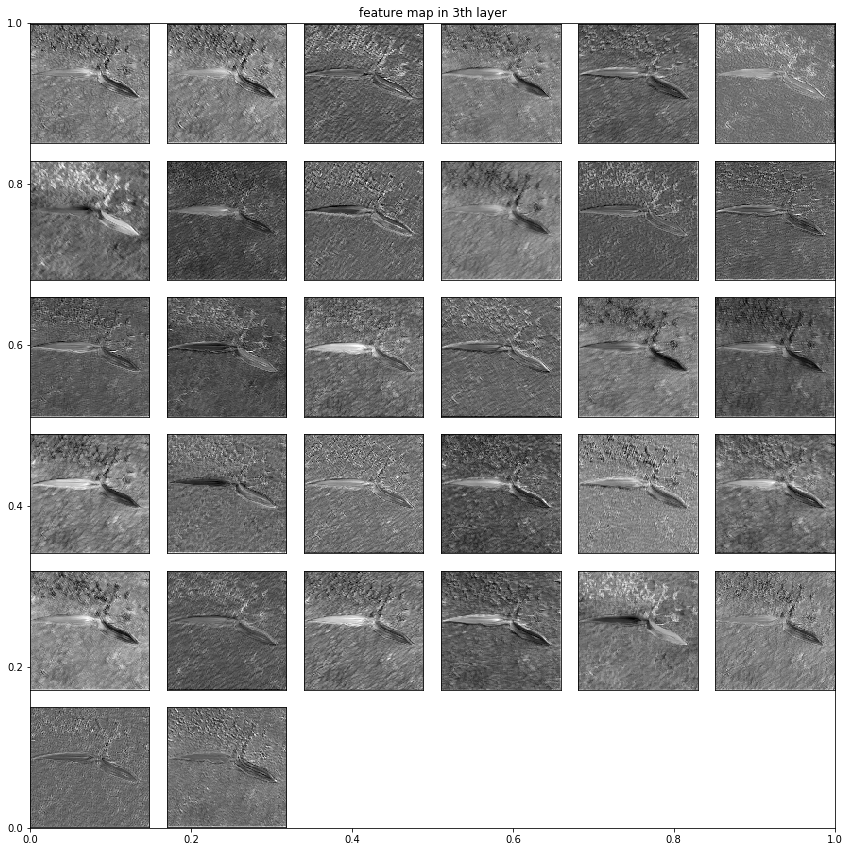

In [177]:
number_of_featuremap = featuremap.shape[2]
fig = plt.figure(figsize = (12,12))
plt.title('feature map in {}th layer'.format(layer_num))
subplot_num = np.ceil(np.sqrt(number_of_featuremap))
for i in range(number_of_featuremap):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    ax.imshow(featuremap[:,:,i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.imshow


#### print the confusion matrix


In [178]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Y_predict = model.predict(test_x)
print (Y_predict.shape)
Y_index = np.argmax(Y_predict, axis = 1)
print(Y_index)

print (classification_report(np.argmax(test_y, axis = 1), Y_index, target_names = names))
print('='*15)
cm =confusion_matrix(np.argmax(test_y, axis = 1), Y_index) 
print(cm)

(32, 5)
[2 0 3 2 3 3 0 2 4 1 2 0 4 1 4 0 3 2 0 4 4 4 2 0 2 3 0 4 2 2 0 4]
                 precision    recall  f1-score   support

       bindweed       0.38      0.38      0.38         8
    lambquarter       0.50      0.33      0.40         3
          maize       0.22      0.33      0.27         6
    sow thistle       1.00      0.83      0.91         6
volunter potato       0.88      0.78      0.82         9

    avg / total       0.62      0.56      0.58        32

[[3 0 5 0 0]
 [1 1 1 0 0]
 [3 0 2 0 1]
 [0 1 0 5 0]
 [1 0 1 0 7]]


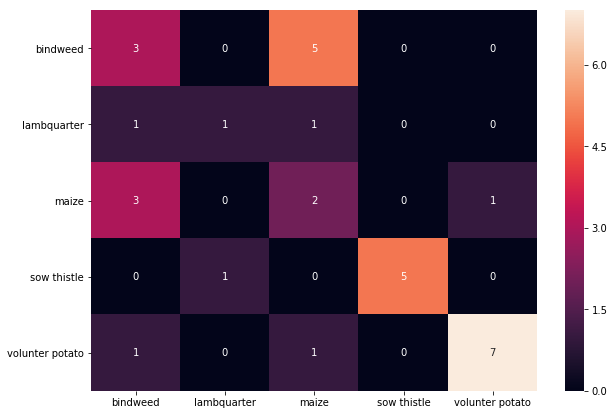

In [179]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(cm, index = [i for i in names], columns = [i for i in names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot = True)
    